## EIA Monthly Electric Grid Data - CO2 Emissions Intensity Model

Goal:  predict how adding X megawatts of solar or wind generation capacity within a Balancing Authority (BA) will affect CO2 emissions per megawatt-hour generated

Monthly generation capacity and operations data was retrieved from the U.S. Energy Information Administration API

See gencap_EDA_prep and genops_EDA_prep for data cleaning and transformation

In [230]:
import pandas as pd
import numpy as np

# load balancing authority generation configuration and operation (output) files to data frames
explan_path = 'genconf.csv'
resp_path = 'genout.csv'
genconf = pd.read_csv(explan_path, low_memory=False)
genout = pd.read_csv(resp_path, low_memory=False)

"genconf" holds monthly generation configuration data for each BA. Columns named with EIA energy source codes contain total installed generation capacity for that energy source. "av_lat" and "av_lon" contain the mean location of power plants in the BA.

In [231]:
genconf.head()

,ba_code,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,...,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,av_lat,av_lon
0,AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
1,AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
2,AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
3,AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599
4,AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599


Normalize installed capacity for each energy source as a proportion of total capacity

In [232]:
# calculate total generation capacity per row
genconf['total_cap_mw'] = genconf.drop(['av_lat','av_lon'], axis=1).sum(axis=1, numeric_only=True)

In [233]:
genconf.head().T

,0,1,2,3,4
ba_code,AEC,AEC,AEC,AEC,AEC
period,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01
BIT,538.0,538.0,538.0,538.0,538.0
DFO,0.0,0.0,0.0,0.0,0.0
GEO,0.0,0.0,0.0,0.0,0.0
JF,0.0,0.0,0.0,0.0,0.0
KER,0.0,0.0,0.0,0.0,0.0
LIG,0.0,0.0,0.0,0.0,0.0
MSW,0.0,0.0,0.0,0.0,0.0
NG,1330.0,1330.0,1330.0,1330.0,1330.0


In [234]:
# divide capacity per energy source by total capacity
genconf_norm = genconf[['ba_code','period','av_lat','av_lon']].join(genconf.drop(['av_lat','av_lon'], axis=1).select_dtypes \
                                                               (include=np.number).apply(lambda x : x/genconf['total_cap_mw']))
genconf_norm.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,total_cap_mw
0,AEC,2013-01-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
1,AEC,2013-02-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
2,AEC,2013-03-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
3,AEC,2013-04-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
4,AEC,2013-05-01,31.264961,-86.674599,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0


Normalize average latitude and longitude features

In [235]:
#normalize latitude to range 0,1
genconf_norm['av_lat'] = genconf_norm['av_lat'].apply(lambda x: (x-genconf_norm['av_lat'].min())/(genconf_norm['av_lat'].max() \
                                                                       - genconf_norm['av_lat'].min()))

In [236]:
#normalize longitude to range 0,1
genconf_norm['av_lon'] = genconf_norm['av_lon'].apply(lambda x: (x-genconf_norm['av_lon'].min())/(genconf_norm['av_lon'].max() \
                                                                       - genconf_norm['av_lon'].min()))

In [237]:
genconf_norm.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO,total_cap_mw
0,AEC,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
1,AEC,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
2,AEC,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
3,AEC,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0
4,AEC,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,1.0


In [238]:
genconf_norm = genconf_norm.drop(columns='total_cap_mw')
genconf_norm.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,SGC,SGP,SLW,SUB,SUN,TDF,WAT,WC,WND,WO
0,AEC,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
1,AEC,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
2,AEC,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
3,AEC,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0
4,AEC,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,0.0,0.0,0.0


"genout" contains monthly data for each BA:  net electricity generated (megawatt-hours), CO2 emitted (metric kilotons), and Carbon Intensity aka specific CO2 emission (kilograms per megawatt-hour)

In [239]:
genout.head()

,Unnamed: 0,period,ba_code,gen_mwh,co2_kton,kg_co2_per_mwh
0,0,2011-10-01,AECI,89375.94,5.319134,59.514158
1,1,2011-10-01,AVA,126924.36,43.122421,339.748972
2,2,2011-10-01,AZPS,1577691.52,1425.363357,903.448703
3,3,2011-10-01,BANC,17864.18,3.974493,222.483953
4,4,2011-10-01,BPAT,881106.62,79.474312,90.198292


In [240]:
genout = genout[['ba_code', 'period', 'gen_mwh', 'co2_kton', 'kg_co2_per_mwh']]

In [241]:
genout.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh
0,AECI,2011-10-01,89375.94,5.319134,59.514158
1,AVA,2011-10-01,126924.36,43.122421,339.748972
2,AZPS,2011-10-01,1577691.52,1425.363357,903.448703
3,BANC,2011-10-01,17864.18,3.974493,222.483953
4,BPAT,2011-10-01,881106.62,79.474312,90.198292


Normalize electricity generated as a proportion of total capacity. Intent is to use this as a feature representing how much of its capacity a BA used on average.

In [242]:
# join total generation capacity to genout
genout_norm = genout.set_index(['ba_code','period']).join(genconf[['ba_code','period','total_cap_mw']].set_index(['ba_code','period']))
genout_norm.head()

,,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw
ba_code,period,,,,
AECI,2011-10-01,89375.94,5.319134,59.514158,NaN
AVA,2011-10-01,126924.36,43.122421,339.748972,NaN
AZPS,2011-10-01,1577691.52,1425.363357,903.448703,NaN
BANC,2011-10-01,17864.18,3.974493,222.483953,NaN
BPAT,2011-10-01,881106.62,79.474312,90.198292,NaN


In [243]:
genout_norm.shape

(7656, 4)

In [244]:
genout_norm.isna().sum()

gen_mwh              0
co2_kton             0
kg_co2_per_mwh     167
total_cap_mw      1160
dtype: int64

In [245]:
genout_norm.dropna()

,,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw
ba_code,period,,,,
AEC,2013-01-01,851290.86,447.537907,525.716800,1881.0
AECI,2013-01-01,3220134.96,2953.802481,917.291517,6107.4
AVA,2013-01-01,807299.78,116.886088,144.786473,2008.5
AZPS,2013-01-01,1572053.50,1365.636525,868.695961,6915.3
BANC,2013-01-01,35853.40,2.175765,60.685040,2762.0
...,...,...,...,...,...
TEC,2022-12-01,1771046.01,841.660123,475.233347,178.7
TEPC,2022-12-01,1771968.52,1731.628946,977.234599,171.7
TVA,2022-12-01,11837943.20,3733.005465,315.342404,1057.0


In [246]:
# normalize using capacity * time, i.e. how much could a BA generate in a month if 
# running all generators at 100% capacity
# using 31 days per month in an effort to keep result <= 1.
genout_norm['avg_mw_per_cap'] = genout_norm['gen_mwh']/(genout_norm['total_cap_mw']*31*24)

In [247]:
genout_norm.tail()

,,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,avg_mw_per_cap
ba_code,period,,,,,
TEPC,2022-12-01,1771968.52,1731.628946,977.234599,171.7,13.871160
TVA,2022-12-01,11837943.20,3733.005465,315.342404,1057.0,15.053183
WACM,2022-12-01,2976114.00,2846.266205,956.370020,3313.0,1.207411
WALC,2022-12-01,2353672.00,748.334332,317.943338,2032.2,1.556706
WAUE,2022-12-01,87898.00,92.679548,1054.398826,NaN,NaN


In [248]:
genout_norm = genout_norm.reset_index()

<Axes: xlabel='period'>

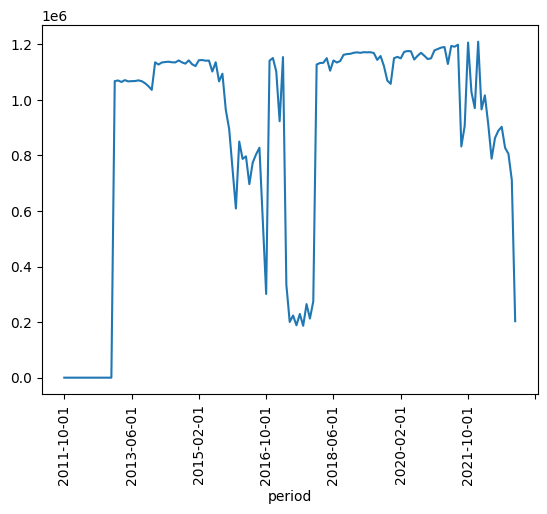

In [249]:
genout_norm.groupby('period')['total_cap_mw'].sum().plot(x='period',y='total_cap_mw', rot=90)

Based on above, suspect missing data in 2022. EIA website states that data is not finalized until the fall following the reporting year.

In [250]:
# remove rows with nonsense generation values (generation exceeds reported capacity)
genout_norm = genout_norm[genout_norm.avg_mw_per_cap <= 1]

In [251]:
genout_norm.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh,total_cap_mw,avg_mw_per_cap
876,AEC,2013-01-01,851290.86,447.537907,525.716800,1881.0,0.608298
877,AECI,2013-01-01,3220134.96,2953.802481,917.291517,6107.4,0.708671
878,AVA,2013-01-01,807299.78,116.886088,144.786473,2008.5,0.540244
879,AZPS,2013-01-01,1572053.50,1365.636525,868.695961,6915.3,0.305551
880,BANC,2013-01-01,35853.40,2.175765,60.685040,2762.0,0.017448


In [252]:
# remove unneeded columns (intermediates)
genout_norm = genout_norm[['ba_code','period','avg_mw_per_cap','kg_co2_per_mwh']]
genout_norm.head()

,ba_code,period,avg_mw_per_cap,kg_co2_per_mwh
876,AEC,2013-01-01,0.608298,525.716800
877,AECI,2013-01-01,0.708671,917.291517
878,AVA,2013-01-01,0.540244,144.786473
879,AZPS,2013-01-01,0.305551,868.695961
880,BANC,2013-01-01,0.017448,60.685040


Join generation configuration and generation output data frames 

In [253]:
gen_norm = genconf_norm.set_index(['ba_code', 'period']).join(genout_norm.set_index(['ba_code', 'period']))

In [254]:
gen_norm.head()

av_lat    av_lon       BIT  DFO  GEO   JF  KER  LIG   
ba_code period                                                              
AEC     2013-01-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0  \
        2013-02-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-03-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-04-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   
        2013-05-01  0.247995  0.704795  0.286018  0.0  0.0  0.0  0.0  0.0   

                    MSW        NG  ...  SLW  SUB  SUN  TDF       WAT   WC   
ba_code period                     ...                                      
AEC     2013-01-01  0.0  0.707071  ...  0.0  0.0  0.0  0.0  0.004359  0.0  \
        2013-02-01  0.0  0.707071  ...  0.0  0.0  0.0  0.0  0.004359  0.0   
        2013-03-01  0.0  0.707071  ...  0.0  0.0  0.0  0.0  0.004359  0.0   
        2013-04-01  0.0  0.707071  ...  0.0  0.0  0.0  0.0  0.004359  0.0   
        2013-05-01  0.0  0.707071  ...  0.0  0.0  0.0  0.0  0.004359  0.0   

                    WND   WO  avg_mw_per_cap  kg_co2_per_mwh  
ba_code period                                                
AEC     2013-01-01  0.0  0.0        0.608298      525.716800  
        2013-02-01  0.0  0.0        0.591000      545.340661  
        2013-03-01  0.0  0.0        0.470554      385.393803  
        2013-04-01  0.0  0.0        0.212973      397.894067  
        2013-05-01  0.0  0.0        0.051038      622.353546  

[5 rows x 28 columns]

In [255]:
gen_norm = gen_norm.reset_index()

In [256]:
ng_price_path = 'NG_price.csv'
ng_price = pd.read_csv(ng_price_path, low_memory=False)
ng_price.head()

,period,NG_price
0,1997-01-01,3.45
1,1997-02-01,2.15
2,1997-03-01,1.89
3,1997-04-01,2.03
4,1997-05-01,2.25


In [257]:
gen_norm = gen_norm.set_index(['period']).join(ng_price.set_index('period')).reset_index()

In [258]:
gen_norm.head()

,period,ba_code,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,SUB,SUN,TDF,WAT,WC,WND,WO,avg_mw_per_cap,kg_co2_per_mwh,NG_price
0,2013-01-01,AEC,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.004359,0.0,0.000000,0.0,0.608298,525.716800,3.33
1,2013-01-01,AECI,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,0.0,...,0.406343,0.000000,0.0,0.017389,0.0,0.051167,0.0,0.708671,917.291517,3.33
2,2013-01-01,AVA,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.575952,0.0,0.052427,0.0,0.540244,144.786473,3.33
3,2013-01-01,AZPS,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,0.0,...,0.163232,0.023875,0.0,0.000000,0.0,0.025205,0.0,0.305551,868.695961,3.33
4,2013-01-01,BANC,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,0.0,...,0.000000,0.038450,0.0,0.265605,0.0,0.000000,0.0,0.017448,60.685040,3.33


In [259]:
gen_norm = gen_norm.dropna()

In [260]:
gen_norm = gen_norm.reset_index()
gen_norm.head()

,index,period,ba_code,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,SUB,SUN,TDF,WAT,WC,WND,WO,avg_mw_per_cap,kg_co2_per_mwh,NG_price
0,0,2013-01-01,AEC,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.004359,0.0,0.000000,0.0,0.608298,525.716800,3.33
1,1,2013-01-01,AECI,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.406343,0.000000,0.0,0.017389,0.0,0.051167,0.0,0.708671,917.291517,3.33
2,2,2013-01-01,AVA,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.575952,0.0,0.052427,0.0,0.540244,144.786473,3.33
3,3,2013-01-01,AZPS,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.163232,0.023875,0.0,0.000000,0.0,0.025205,0.0,0.305551,868.695961,3.33
4,4,2013-01-01,BANC,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.000000,0.038450,0.0,0.265605,0.0,0.000000,0.0,0.017448,60.685040,3.33


In [261]:
move_col = gen_norm.pop('ba_code')
gen_norm.insert(0, move_col.name, move_col)
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,SUB,SUN,TDF,WAT,WC,WND,WO,avg_mw_per_cap,kg_co2_per_mwh,NG_price
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.004359,0.0,0.000000,0.0,0.608298,525.716800,3.33
1,AECI,1,2013-01-01,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.406343,0.000000,0.0,0.017389,0.0,0.051167,0.0,0.708671,917.291517,3.33
2,AVA,2,2013-01-01,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.575952,0.0,0.052427,0.0,0.540244,144.786473,3.33
3,AZPS,3,2013-01-01,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.163232,0.023875,0.0,0.000000,0.0,0.025205,0.0,0.305551,868.695961,3.33
4,BANC,4,2013-01-01,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.000000,0.038450,0.0,0.265605,0.0,0.000000,0.0,0.017448,60.685040,3.33


In [262]:
gen_norm.columns

Index(['ba_code', 'index', 'period', 'av_lat', 'av_lon', 'BIT', 'DFO', 'GEO',
       'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO',
       'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO',
       'avg_mw_per_cap', 'kg_co2_per_mwh', 'NG_price'],
      dtype='object')

In [263]:
move_col = gen_norm.pop('NG_price')
gen_norm.insert(gen_norm.columns.get_loc('avg_mw_per_cap'), move_col.name, move_col)
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,SUB,SUN,TDF,WAT,WC,WND,WO,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.004359,0.0,0.000000,0.0,3.33,0.608298,525.716800
1,AECI,1,2013-01-01,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.406343,0.000000,0.0,0.017389,0.0,0.051167,0.0,3.33,0.708671,917.291517
2,AVA,2,2013-01-01,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.575952,0.0,0.052427,0.0,3.33,0.540244,144.786473
3,AZPS,3,2013-01-01,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.163232,0.023875,0.0,0.000000,0.0,0.025205,0.0,3.33,0.305551,868.695961
4,BANC,4,2013-01-01,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.000000,0.038450,0.0,0.265605,0.0,0.000000,0.0,3.33,0.017448,60.685040


In [264]:
# normalize natural gas price
gen_norm['NG_price'] = (gen_norm['NG_price'] - gen_norm['NG_price'].min())/(gen_norm['NG_price'].max() \
    - gen_norm['NG_price'].min())

In [265]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,SUB,SUN,TDF,WAT,WC,WND,WO,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.004359,0.0,0.000000,0.0,0.236769,0.608298,525.716800
1,AECI,1,2013-01-01,0.601600,0.588005,0.000000,0.023496,0.0,0.0,0.0,...,0.406343,0.000000,0.0,0.017389,0.0,0.051167,0.0,0.236769,0.708671,917.291517
2,AVA,2,2013-01-01,0.953613,0.107221,0.000000,0.001394,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.575952,0.0,0.052427,0.0,0.236769,0.540244,144.786473
3,AZPS,3,2013-01-01,0.341446,0.199516,0.328200,0.017902,0.0,0.0,0.0,...,0.163232,0.023875,0.0,0.000000,0.0,0.025205,0.0,0.236769,0.305551,868.695961
4,BANC,4,2013-01-01,0.562908,0.027251,0.000000,0.051919,0.0,0.0,0.0,...,0.000000,0.038450,0.0,0.265605,0.0,0.000000,0.0,0.236769,0.017448,60.685040


In [266]:
gen_norm = gen_norm.sort_values(by=['ba_code','period'])

In [267]:
gen_norm = gen_norm[gen_norm.kg_co2_per_mwh >= 0]

<Axes: xlabel='period'>

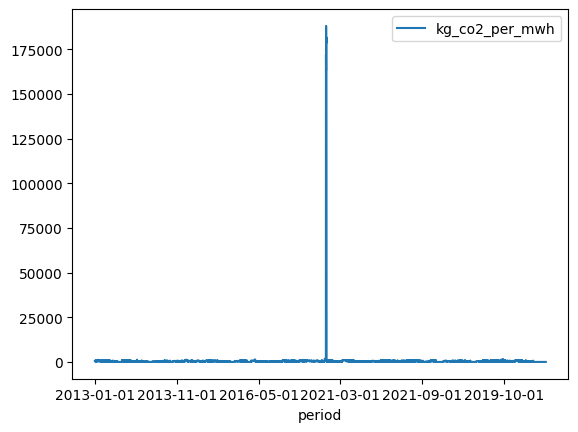

In [268]:
gen_norm.plot(x='period',y='kg_co2_per_mwh')

In [269]:
# drop outlier carbon intensity values
gen_norm = gen_norm.drop(gen_norm[gen_norm.kg_co2_per_mwh > 1000].index)

<Axes: xlabel='period'>

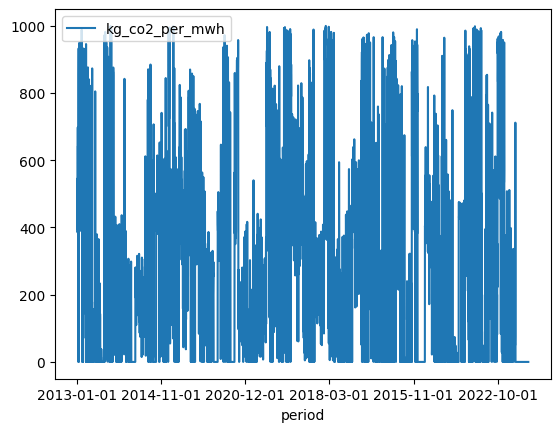

In [270]:
gen_norm.plot(x='period',y='kg_co2_per_mwh')

Use Fast Fourier Transform to check for actual seasonality in the response variable

In [271]:
ci_monthly = gen_norm.groupby('period')['kg_co2_per_mwh'].mean()
ci_monthly.head()

period
2013-01-01    425.791310
2013-02-01    420.214739
2013-03-01    352.115789
2013-04-01    439.209743
2013-05-01    357.093198
Name: kg_co2_per_mwh, dtype: float64

In [272]:
type(ci_monthly)

pandas.core.series.Series

Text(0.5, 0, '# Cycles in full window of data (~5 years)')

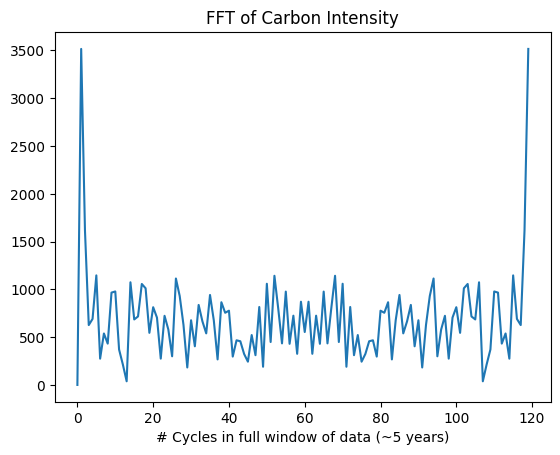

In [273]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt

# apply FFT to emissions intensity deviation from mean
fft_ci = fft((ci_monthly - ci_monthly.mean()).values)

# plot emissions intensity deviation in frequency domain
plt.plot(np.abs(fft_ci))
plt.title("FFT of Carbon Intensity")
plt.xlabel('# Cycles in full window of data (~5 years)')

Text(0.5, 0, 'Frequency ($y^{-1}$)')

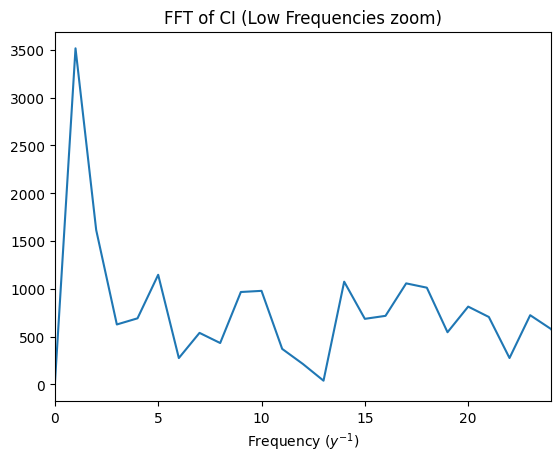

In [274]:
# zoom on sub-annual frequencies
plt.plot(np.abs(fft_ci))
plt.title("FFT of CI (Low Frequencies zoom)")
plt.xlim([0,24])
plt.xlabel('Frequency ($y^{-1}$)')

Examine features graphically

In [275]:
gen_norm.columns

Index(['ba_code', 'index', 'period', 'av_lat', 'av_lon', 'BIT', 'DFO', 'GEO',
       'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH', 'PC', 'PG', 'RC', 'RFO',
       'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WND', 'WO',
       'NG_price', 'avg_mw_per_cap', 'kg_co2_per_mwh'],
      dtype='object')

C:\Users\lilye\AppData\Local\Temp\ipykernel_25896\135135664.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


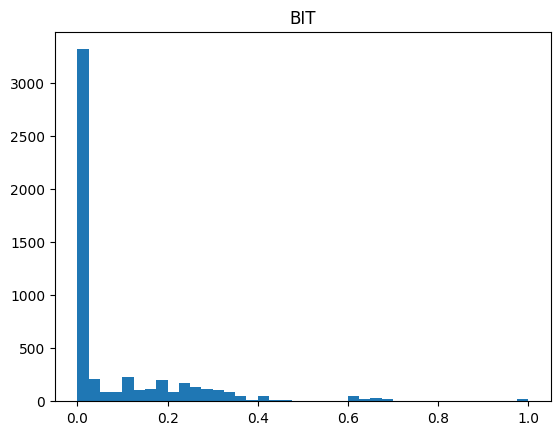

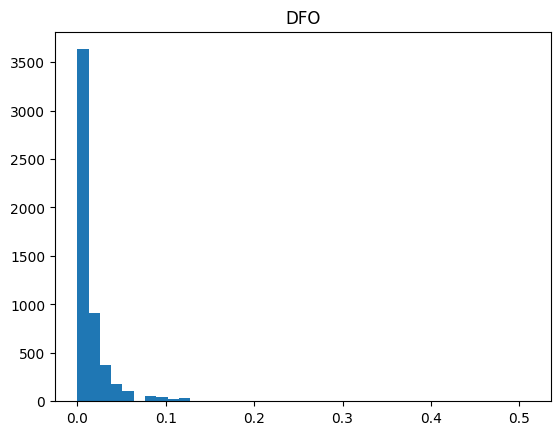

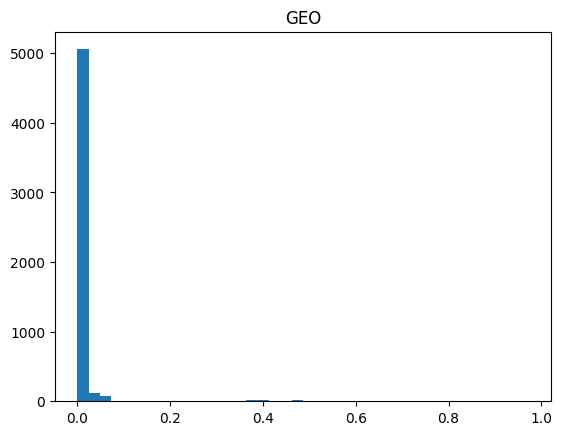

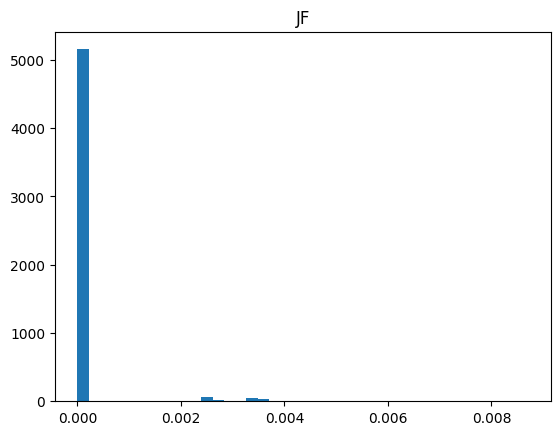

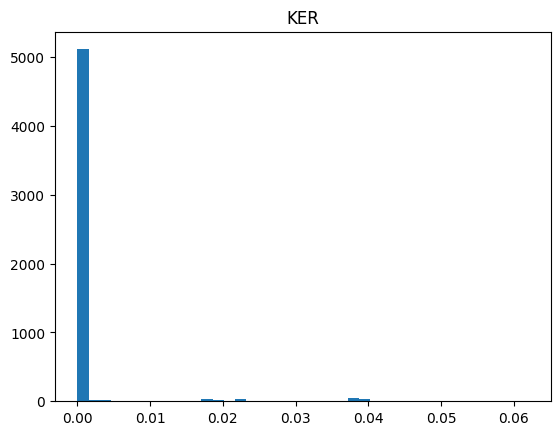

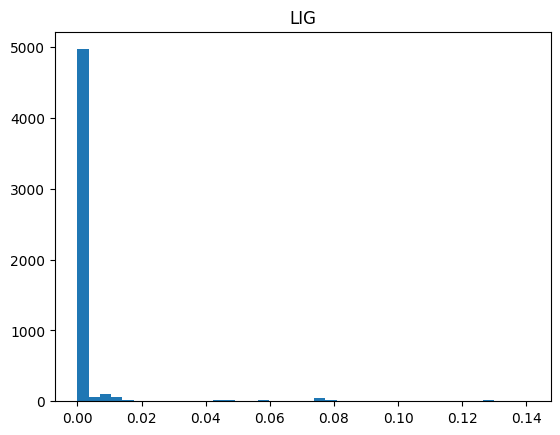

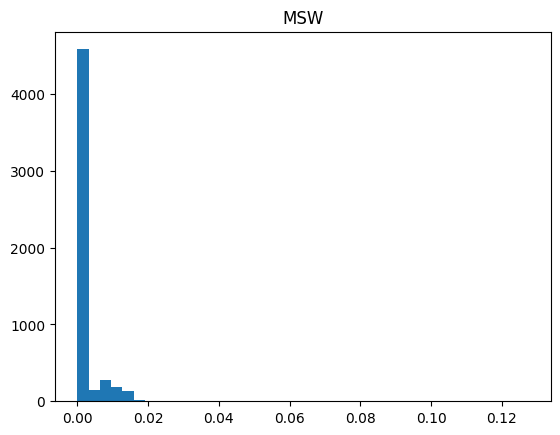

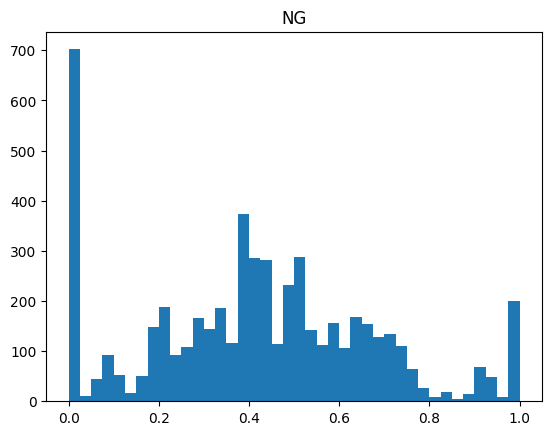

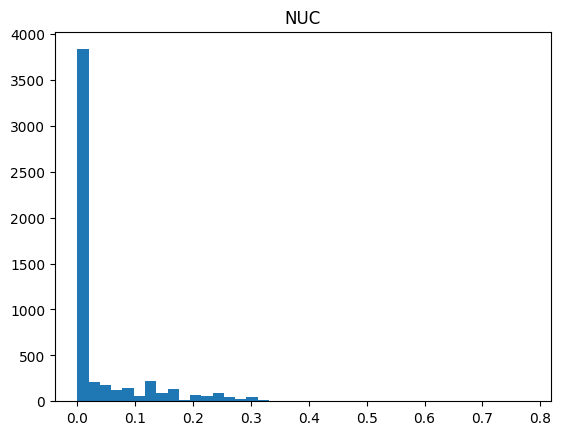

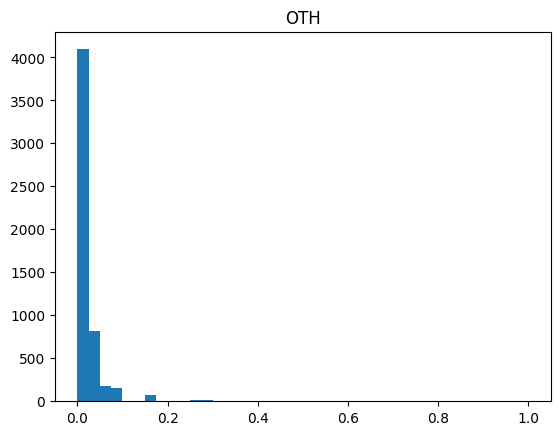

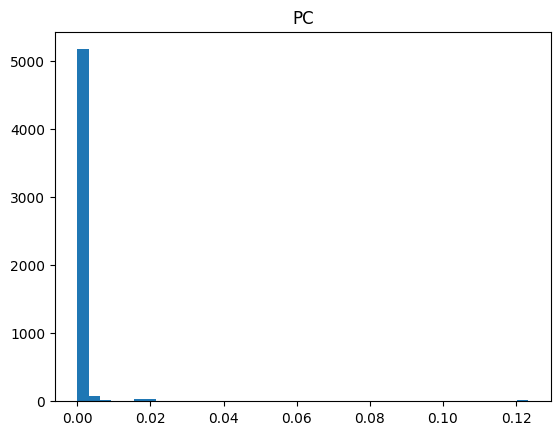

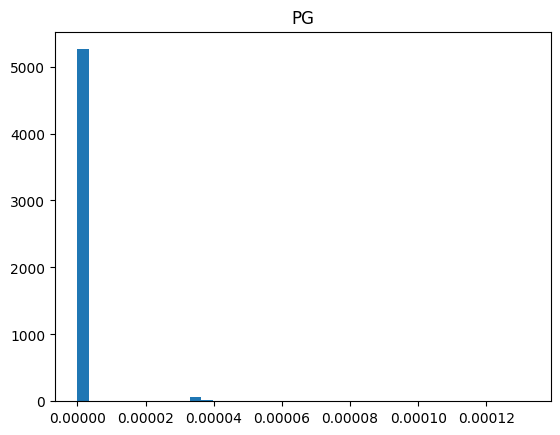

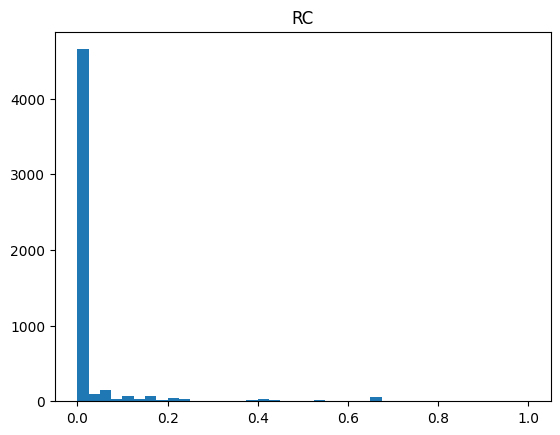

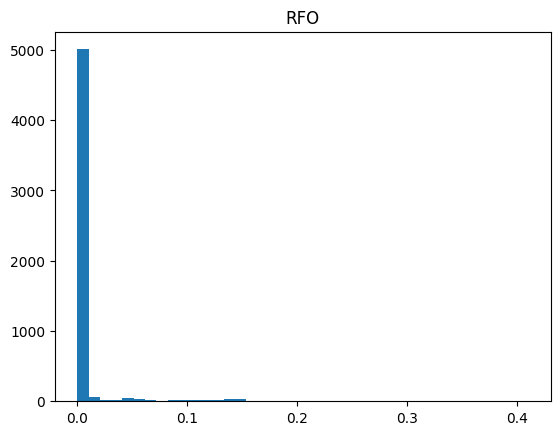

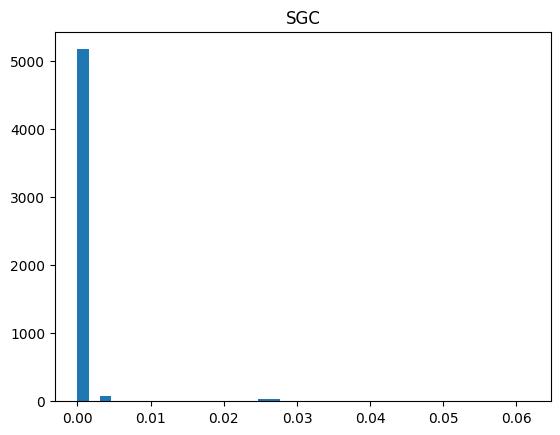

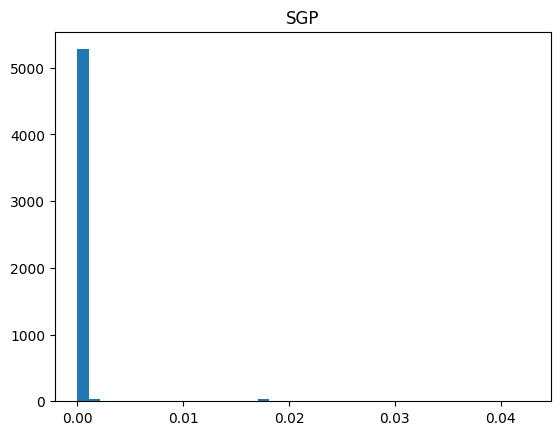

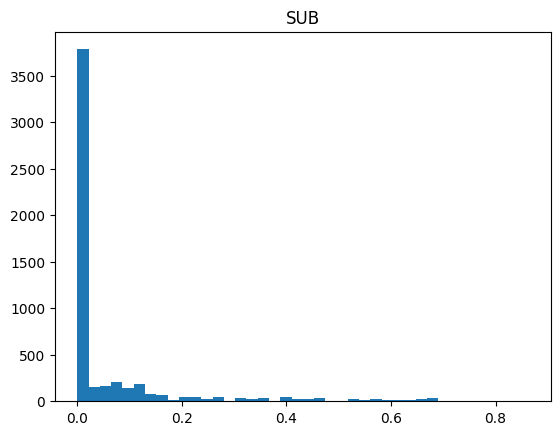

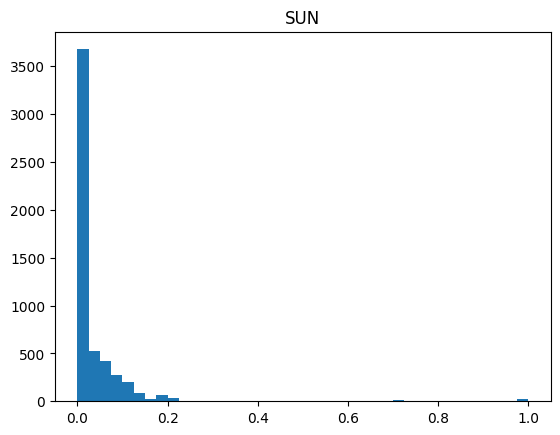

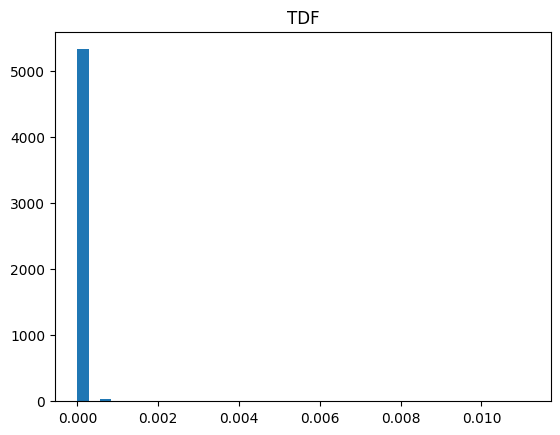

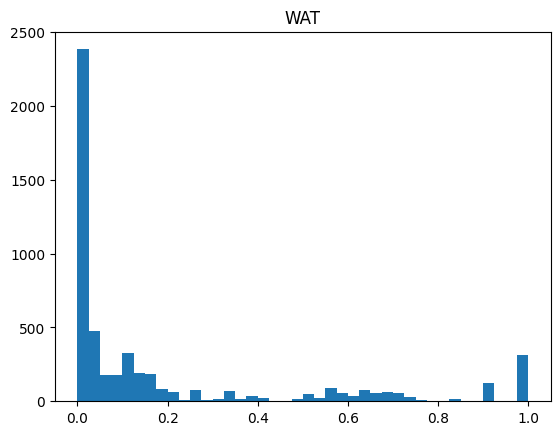

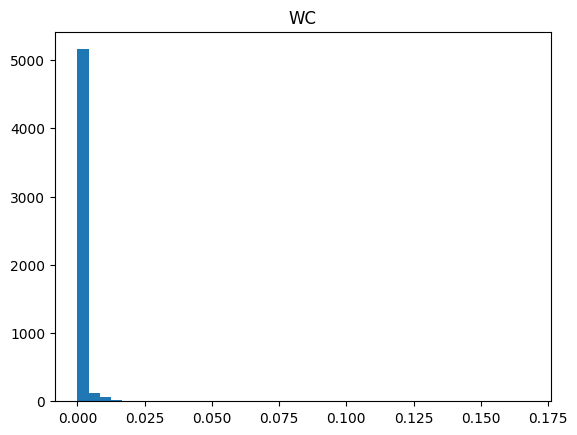

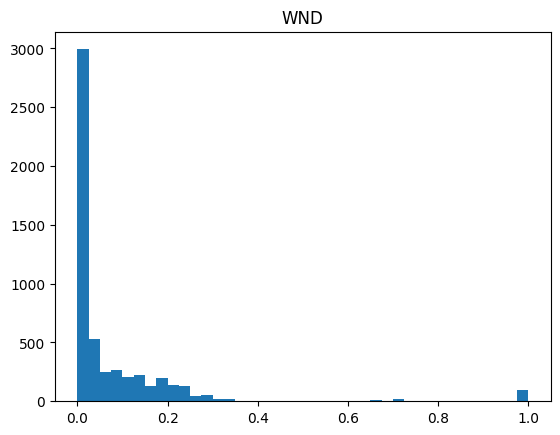

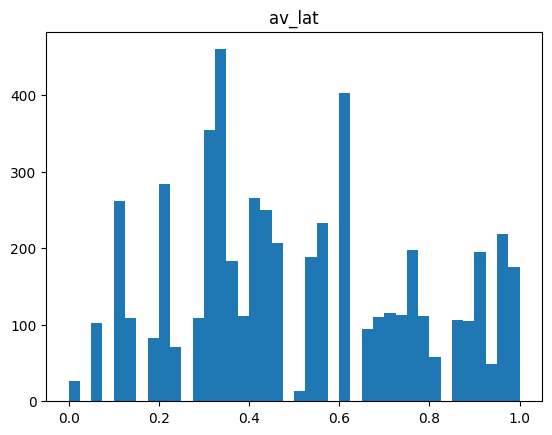

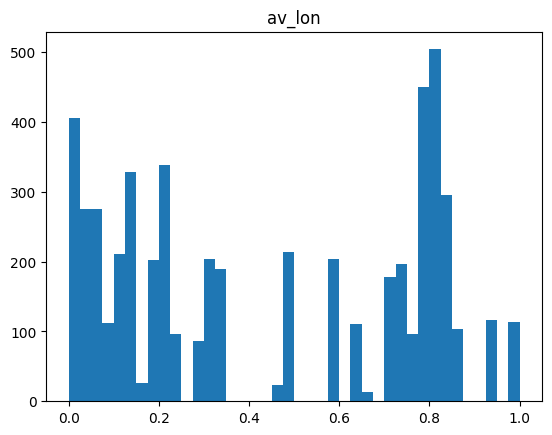

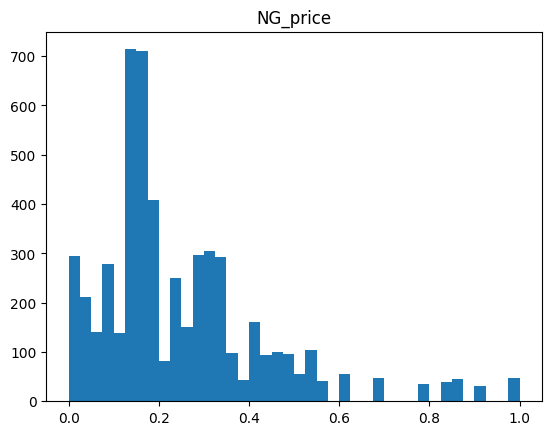

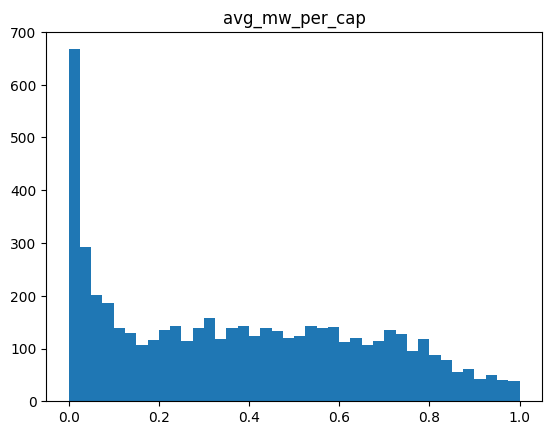

In [276]:
X_names = ['BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH'
       ,'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SUB', 'SUN', 'TDF', 'WAT', 'WC'
       ,'WND' 
       , 'av_lat', 'av_lon' 
       , 'NG_price', 'avg_mw_per_cap'
       ]
for X in X_names:
    plt.figure()
    plt.title(X)
    plt.hist(gen_norm[X], bins=40)


In [277]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,SUB,SUN,TDF,WAT,WC,WND,WO,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,0.236769,0.608298,525.716800
53,AEC,63,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,0.236769,0.591000,545.340661
107,AEC,126,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,0.303621,0.470554,385.393803
158,AEC,189,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,0.353760,0.212973,397.894067
212,AEC,252,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,0.335655,0.051038,622.353546


Most features appear right-skewed. Apply log transform using log(1+X). Avoids undefined result at log(0).

In [278]:
import numpy as np

# list feature names to log transform
X_log_names = ['BIT', 'DFO', 'GEO', 'JF', 'KER', 'LIG', 'MSW', 'NG', 'NUC', 'OTH',
       'PC', 'PG', 'RC', 'RFO', 'SGC', 'SGP', 'SUB', 'SUN', 'TDF', 'WAT', 'WC',
       'WND', 'NG_price', 'avg_mw_per_cap']

# copy the dataset. Don't use 'new_df = old_df', as changes will retroactively apply to 'old_df'
gen_norm_log = gen_norm.copy()
gen_norm_log[X_log_names] = gen_norm_log[X_log_names].apply(lambda x: np.log(1+x))
gen_norm_log.head()


,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,SUB,SUN,TDF,WAT,WC,WND,WO,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.212502,0.475176,525.716800
53,AEC,63,2013-02-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.212502,0.464363,545.340661
107,AEC,126,2013-03-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.265146,0.385640,385.393803
158,AEC,189,2013-04-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.302886,0.193074,397.894067
212,AEC,252,2013-05-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.289422,0.049778,622.353546


In [279]:
gen_norm.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,SUB,SUN,TDF,WAT,WC,WND,WO,NG_price,avg_mw_per_cap,kg_co2_per_mwh
0,AEC,0,2013-01-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,0.236769,0.608298,525.716800
53,AEC,63,2013-02-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,0.236769,0.591000,545.340661
107,AEC,126,2013-03-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,0.303621,0.470554,385.393803
158,AEC,189,2013-04-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,0.353760,0.212973,397.894067
212,AEC,252,2013-05-01,0.247995,0.704795,0.286018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004359,0.0,0.0,0.0,0.335655,0.051038,622.353546


Correlation Matrix

<Axes: >

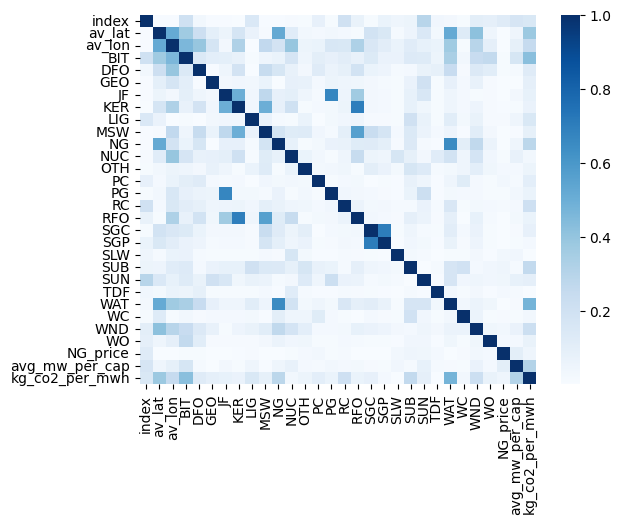

In [280]:
import seaborn as sns

sns.heatmap(data=abs(gen_norm_log.corr(numeric_only=True)), cmap='Blues', xticklabels=True, yticklabels=True)

Select feature names manually

In [281]:
X_names = [ 'NG', 'WND', 'WAT', 'NUC', 'BIT', 'SUB', 'RC', 'SUN', 'DFO', 'OTH', 'RFO', 'GEO'
       , 'JF', 'KER', 'LIG', 'MSW', 'PC', 'PG',   'SGC', 'SGP',   'TDF',  'WC' 
       , 'NG_price'
       , 'av_lat', 'av_lon' 
       , 'avg_mw_per_cap'
       ]

In [282]:
# add features
# use SelectKBest and f_regression from scikit-learn to optimize features?

# tune using grid search on k?
# https://machinelearningmastery.com/feature-selection-for-regression-data/

#Ridge regression has built-in cross validation

#random forest regression


In [ ]:
# features to add:  log transformed in same table as untransformed, BAs (1 hot encoding)
# maybe combine florida bpats into one
# or use regions

In [283]:
'''
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(rfr_base.estimators_[0], feature_names=X_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('tree', view=True)
'''

"\nfrom sklearn.tree import export_graphviz\nimport graphviz\n\ndot_data = export_graphviz(rfr_base.estimators_[0], feature_names=X_names, filled=True, rounded=True)\ngraph = graphviz.Source(dot_data, format='png')\ngraph.render('tree', view=True)\n"

### Random Forest Regression with hyperparameter optimization using randomized search cross validation
 * Response variable is CO2 Intensity (kg CO2 per MW-hr generated)
 * Explanatory variables are selected features in the following categories: generator configuration (installed capacity by fuel source), specific power, location (geographical average for BA), [seasonality], fuel price (natural gas only)

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def rfrBaseline(X_train, y_train):
    rfr_base = RandomForestRegressor(max_depth=2, min_samples_split=2, n_estimators = 100, random_state=1)
    rfr_base.fit(X_train, y_train)
    return rfr_base

def rfrTrainTune(X_train, y_train):
    rfr = RandomForestRegressor()
    #max_depth and min_samples_split are chosen as hyperparameters
    rs = RandomizedSearchCV(rfr, n_iter=10, param_distributions={'n_estimators': range(50,150,5) \
                        , 'max_depth': range(1,30) \
                        , 'min_samples_split':range(2,30) \
                        , 'max_features': ['sqrt', 'log2', None]} \
                        , cv=5, n_jobs=-1, random_state=7, scoring='r2')
    rs.fit(X_train, y_train)
    print(f"rs best params:  {rs.best_params_}")
    print(f"rs best score  {rs.best_score_}")
    # apply best hyperparameter values to random forest regression model
    rfr_tuned = RandomForestRegressor(**rs.best_params_, random_state=42)
    # fit tuned model to data set 
    rfr_tuned.fit(X_train, y_train)
    return rfr_tuned

def rfrTest(rfr_model, X_test, y_test):
    y_pred = rfr_model.predict(X_test)
    error = abs(y_pred - y_test)
    mae = np.mean(error)
    mape = 100 * np.mean(error / y_test)
    accuracy = 100 - mape
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Model Performance')
    print(f"R squared:  {r2}")
    print(f"mean squared error:  {mse}")
    print(f"mean absolute error:  {mae}")
    print(f"mean absolute percentage error:  {mape}")
    print(f"accuracy:  {accuracy}")
    return accuracy
    


In [285]:
X = gen_norm_log[X_names]
y = gen_norm_log['kg_co2_per_mwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2, shuffle=True)
rfr_base = rfrBaseline(X_train, y_train)
rfr_tuned = rfrTrainTune(X_train, y_train)
base_acc = rfrTest(rfr_base, X_test, y_test)
tuned_acc = rfrTest(rfr_tuned, X_test, y_test)


rs best params:  {'n_estimators': 110, 'min_samples_split': 13, 'max_features': None, 'max_depth': 17}
rs best score  0.7584402263280093
Model Performance
R squared:  0.39350782138360385
mean squared error:  52093.81768721019
mean absolute error:  179.6310406269443
mean absolute percentage error:  inf
accuracy:  -inf
Model Performance
R squared:  0.7743982372868009
mean squared error:  19377.75541228872
mean absolute error:  93.18972629263692
mean absolute percentage error:  inf
accuracy:  -inf


In [286]:
def showResiduals(dataset, model, exp_var_names, resp_var_name):
    dataset_check = dataset.copy()
    dataset_check[f"predicted_{resp_var_name}"] = model.predict(dataset_check[exp_var_names])
    dataset_check.plot.scatter(x=resp_var_name, y=f"predicted_{resp_var_name}")

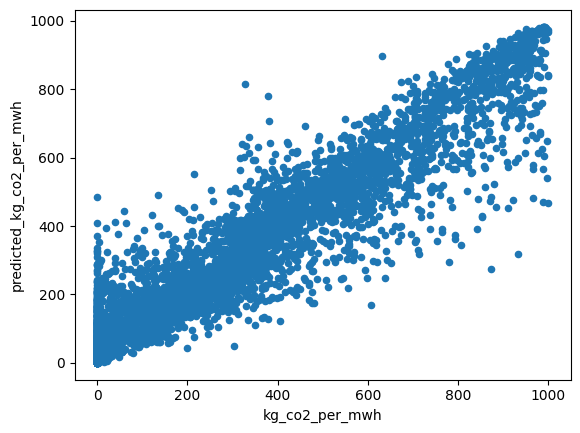

In [287]:
showResiduals(gen_norm_log, rfr_tuned, X_names, 'kg_co2_per_mwh')

## Use model to predict how adding 10 MW of solar generation capacity to a Balancing Authority would affect CO2 emissions

In [288]:
# average most recent two years of reliable configuration data to approximate current configuration (2020 and 2021)
# same for gen_mwh to approximate future generation (~demand)? Or use more years for smoothing?

In [289]:
gen_snap = gen_norm_log[(gen_norm_log.period >= '2018-01-01') & (gen_norm_log.period <= '2020-01-01')]
gen_snap.head()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,SUB,SUN,TDF,WAT,WC,WND,WO,NG_price,avg_mw_per_cap,kg_co2_per_mwh
2715,AEC,3718,2018-02-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.135271,0.371931,390.277157
2807,AEC,3850,2018-04-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.150962,0.397589,396.081591
2987,AEC,4114,2018-08-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.169943,0.162897,604.078432
3037,AEC,4180,2018-09-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.174632,0.463198,691.636704
3091,AEC,4246,2018-10-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00435,0.0,0.0,0.0,0.206856,0.484957,671.676491


In [290]:
gen_snap.tail()

,ba_code,index,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,...,SUB,SUN,TDF,WAT,WC,WND,WO,NG_price,avg_mw_per_cap,kg_co2_per_mwh
3505,WWA,4772,2019-05-01,1.000000,0.207439,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,0.131615,0.535772,0.0
3560,WWA,4838,2019-06-01,1.000000,0.207439,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,0.101873,0.493883,0.0
3652,WWA,4970,2019-08-01,1.000000,0.207439,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,0.078971,0.465339,0.0
3884,WWA,5299,2020-01-01,1.000000,0.207439,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,0.052894,0.664135,0.0
3402,YAD,4641,2019-03-01,0.428168,0.832591,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.693147,0.0,0.000000,0.0,0.168767,0.592583,0.0


In [291]:
genout.head()

,ba_code,period,gen_mwh,co2_kton,kg_co2_per_mwh
0,AECI,2011-10-01,89375.94,5.319134,59.514158
1,AVA,2011-10-01,126924.36,43.122421,339.748972
2,AZPS,2011-10-01,1577691.52,1425.363357,903.448703
3,BANC,2011-10-01,17864.18,3.974493,222.483953
4,BPAT,2011-10-01,881106.62,79.474312,90.198292


In [292]:
gen_snap = gen_snap.drop(columns=['index'])

In [293]:
gen_snap = gen_snap.set_index(['ba_code', 'period']).join(genout.set_index(['ba_code', 'period'])[['gen_mwh', 'co2_kton']])

In [294]:
genconf.head()

,ba_code,period,BIT,DFO,GEO,JF,KER,LIG,MSW,NG,...,SUB,SUN,TDF,WAT,WC,WND,WO,av_lat,av_lon,total_cap_mw
0,AEC,2013-01-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
1,AEC,2013-02-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
2,AEC,2013-03-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
3,AEC,2013-04-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0
4,AEC,2013-05-01,538.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,...,0.0,0.0,0.0,8.2,0.0,0.0,0.0,31.264961,-86.674599,1881.0


In [295]:
gen_snap = gen_snap.join(genconf.set_index(['ba_code','period'])[['total_cap_mw']])

In [296]:
gen_snap = gen_snap.rename(columns={'SUN':'SUN_old'})
gen_snap['SUN'] = (gen_snap['SUN_old'] * gen_snap['total_cap_mw'] + 10) / (gen_snap['total_cap_mw'])
gen_snap = gen_snap.reset_index()
gen_snap.head()

,ba_code,period,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,WC,WND,WO,NG_price,avg_mw_per_cap,kg_co2_per_mwh,gen_mwh,co2_kton,total_cap_mw,SUN
0,AEC,2018-02-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.135271,0.371931,390.277157,630504.48,246.071496,1881.0,0.005316
1,AEC,2018-04-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.150962,0.397589,396.081591,683263.22,270.627983,1881.0,0.005316
2,AEC,2018-08-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.169943,0.162897,604.078432,247587.00,149.561967,1881.0,0.005316
3,AEC,2018-09-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.174632,0.463198,691.636704,824491.44,570.248542,1881.0,0.005316
4,AEC,2018-10-01,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.206856,0.484957,671.676491,873413.84,586.651544,1881.0,0.005316


In [297]:
gen_snap['month'] = gen_snap['period'].apply(lambda m : pd.to_datetime(m).month)
gen_snap = gen_snap.drop(columns='period').groupby(['ba_code', 'month']).mean()
gen_snap.head()

av_lat    av_lon       BIT  DFO  GEO   JF  KER  LIG  MSW   
ba_code month                                                               
AEC     1      0.247995  0.704795  0.251551  0.0  0.0  0.0  0.0  0.0  0.0  \
        2      0.247995  0.704795  0.251551  0.0  0.0  0.0  0.0  0.0  0.0   
        3      0.247995  0.704795  0.251551  0.0  0.0  0.0  0.0  0.0  0.0   
        4      0.247995  0.704795  0.251551  0.0  0.0  0.0  0.0  0.0  0.0   
        5      0.247995  0.704795  0.251551  0.0  0.0  0.0  0.0  0.0  0.0   

                     NG  ...   WC  WND   WO  NG_price  avg_mw_per_cap   
ba_code month            ...                                            
AEC     1      0.534779  ...  0.0  0.0  0.0  0.187415        0.529801  \
        2      0.534779  ...  0.0  0.0  0.0  0.136486        0.396741   
        3      0.534779  ...  0.0  0.0  0.0  0.168767        0.489095   
        4      0.534779  ...  0.0  0.0  0.0  0.141898        0.361250   
        5      0.534779  ...  0.0  0.0  0.0  0.131615        0.542445   

               kg_co2_per_mwh      gen_mwh    co2_kton  total_cap_mw       SUN  
ba_code month                                                                   
AEC     1          582.564693   977657.060  569.548485        1881.0  0.005316  
        2          418.484592   682139.585  286.921399        1881.0  0.005316  
        3          462.687412   882837.250  408.477683        1881.0  0.005316  
        4          492.284169   610263.390  293.400234        1881.0  0.005316  
        5          509.196655  1007904.280  513.221488        1881.0  0.005316  

[5 rows x 33 columns]

In [298]:
gen_snap['kg_co2_per_mwh_pred'] = rfr_tuned.predict(gen_snap[X_names])
gen_snap.head()

av_lat    av_lon       BIT  DFO  GEO   JF  KER  LIG  MSW   
ba_code month                                                               
AEC     1      0.247995  0.704795  0.251551  0.0  0.0  0.0  0.0  0.0  0.0  \
        2      0.247995  0.704795  0.251551  0.0  0.0  0.0  0.0  0.0  0.0   
        3      0.247995  0.704795  0.251551  0.0  0.0  0.0  0.0  0.0  0.0   
        4      0.247995  0.704795  0.251551  0.0  0.0  0.0  0.0  0.0  0.0   
        5      0.247995  0.704795  0.251551  0.0  0.0  0.0  0.0  0.0  0.0   

                     NG  ...  WND   WO  NG_price  avg_mw_per_cap   
ba_code month            ...                                       
AEC     1      0.534779  ...  0.0  0.0  0.187415        0.529801  \
        2      0.534779  ...  0.0  0.0  0.136486        0.396741   
        3      0.534779  ...  0.0  0.0  0.168767        0.489095   
        4      0.534779  ...  0.0  0.0  0.141898        0.361250   
        5      0.534779  ...  0.0  0.0  0.131615        0.542445   

               kg_co2_per_mwh      gen_mwh    co2_kton  total_cap_mw   
ba_code month                                                          
AEC     1          582.564693   977657.060  569.548485        1881.0  \
        2          418.484592   682139.585  286.921399        1881.0   
        3          462.687412   882837.250  408.477683        1881.0   
        4          492.284169   610263.390  293.400234        1881.0   
        5          509.196655  1007904.280  513.221488        1881.0   

                    SUN  kg_co2_per_mwh_pred  
ba_code month                                 
AEC     1      0.005316           540.965804  
        2      0.005316           483.375069  
        3      0.005316           526.903518  
        4      0.005316           531.797054  
        5      0.005316           522.514224  

[5 rows x 34 columns]

In [299]:
gen_snap = gen_snap.reset_index()

In [300]:
gen_snap.head()

,ba_code,month,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,WND,WO,NG_price,avg_mw_per_cap,kg_co2_per_mwh,gen_mwh,co2_kton,total_cap_mw,SUN,kg_co2_per_mwh_pred
0,AEC,1,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.187415,0.529801,582.564693,977657.060,569.548485,1881.0,0.005316,540.965804
1,AEC,2,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.136486,0.396741,418.484592,682139.585,286.921399,1881.0,0.005316,483.375069
2,AEC,3,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.168767,0.489095,462.687412,882837.250,408.477683,1881.0,0.005316,526.903518
3,AEC,4,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.141898,0.361250,492.284169,610263.390,293.400234,1881.0,0.005316,531.797054
4,AEC,5,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.131615,0.542445,509.196655,1007904.280,513.221488,1881.0,0.005316,522.514224


In [301]:
gen_snap['co2_kton_pred'] = gen_snap['gen_mwh'] * gen_snap['kg_co2_per_mwh_pred'] / 1e6

In [302]:
gen_snap.head()

,ba_code,month,av_lat,av_lon,BIT,DFO,GEO,JF,KER,LIG,...,WO,NG_price,avg_mw_per_cap,kg_co2_per_mwh,gen_mwh,co2_kton,total_cap_mw,SUN,kg_co2_per_mwh_pred,co2_kton_pred
0,AEC,1,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.187415,0.529801,582.564693,977657.060,569.548485,1881.0,0.005316,540.965804,528.879038
1,AEC,2,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.136486,0.396741,418.484592,682139.585,286.921399,1881.0,0.005316,483.375069,329.729269
2,AEC,3,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.168767,0.489095,462.687412,882837.250,408.477683,1881.0,0.005316,526.903518,465.170053
3,AEC,4,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.141898,0.361250,492.284169,610263.390,293.400234,1881.0,0.005316,531.797054,324.536273
4,AEC,5,0.247995,0.704795,0.251551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.131615,0.542445,509.196655,1007904.280,513.221488,1881.0,0.005316,522.514224,526.644323


<Axes: xlabel='month'>

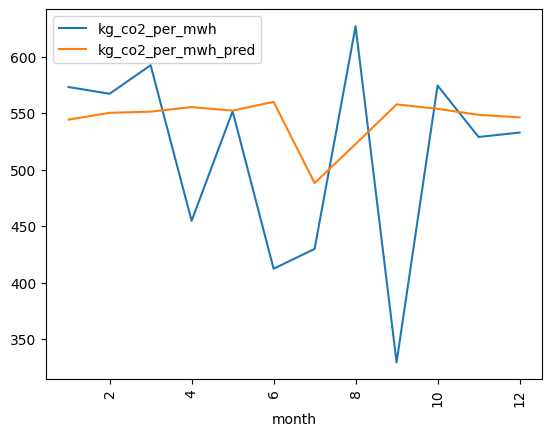

In [303]:
gen_snap[gen_snap.ba_code == 'MISO'].set_index('month')[['kg_co2_per_mwh','kg_co2_per_mwh_pred']].plot(rot=90)

<Axes: xlabel='month'>

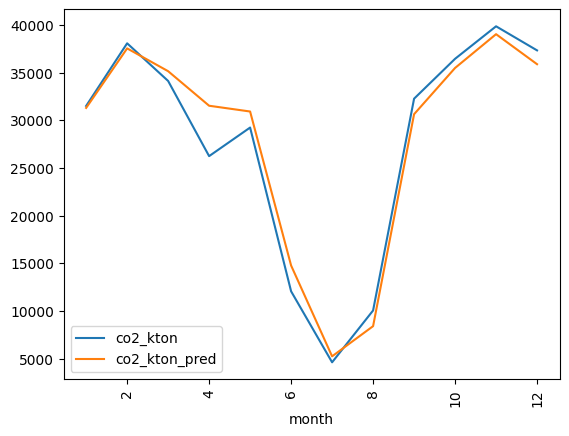

In [304]:
gen_snap[gen_snap.ba_code == 'MISO'].set_index('month')[['co2_kton','co2_kton_pred']].plot(rot=90)

<Axes: xlabel='month'>

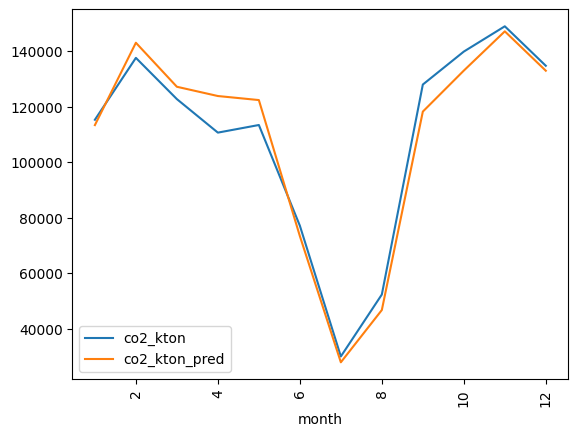

In [305]:
gen_snap.groupby('month').sum()[['co2_kton','co2_kton_pred']].plot(rot=90)

In [306]:
co2_annual = gen_snap.groupby('ba_code')[['co2_kton','co2_kton_pred']].sum()

In [307]:
co2_annual['delta_co2_ktons'] = co2_annual['co2_kton_pred'] - co2_annual['co2_kton']

In [308]:
co2_annual

,co2_kton,co2_kton_pred,delta_co2_ktons
ba_code,,,
AEC,4371.005210,4339.414994,-31.590215
AECI,10401.891949,9418.388438,-983.503511
AVA,730.754765,610.678108,-120.076656
AVRN,0.000000,0.337412,0.337412
AZPS,13744.763731,14056.818245,312.054514
...,...,...,...
WACM,15812.525241,15194.373532,-618.151709
WALC,2369.502327,2652.495981,282.993654
WAUW,0.000000,0.074478,0.074478


<Axes: ylabel='ba_code'>

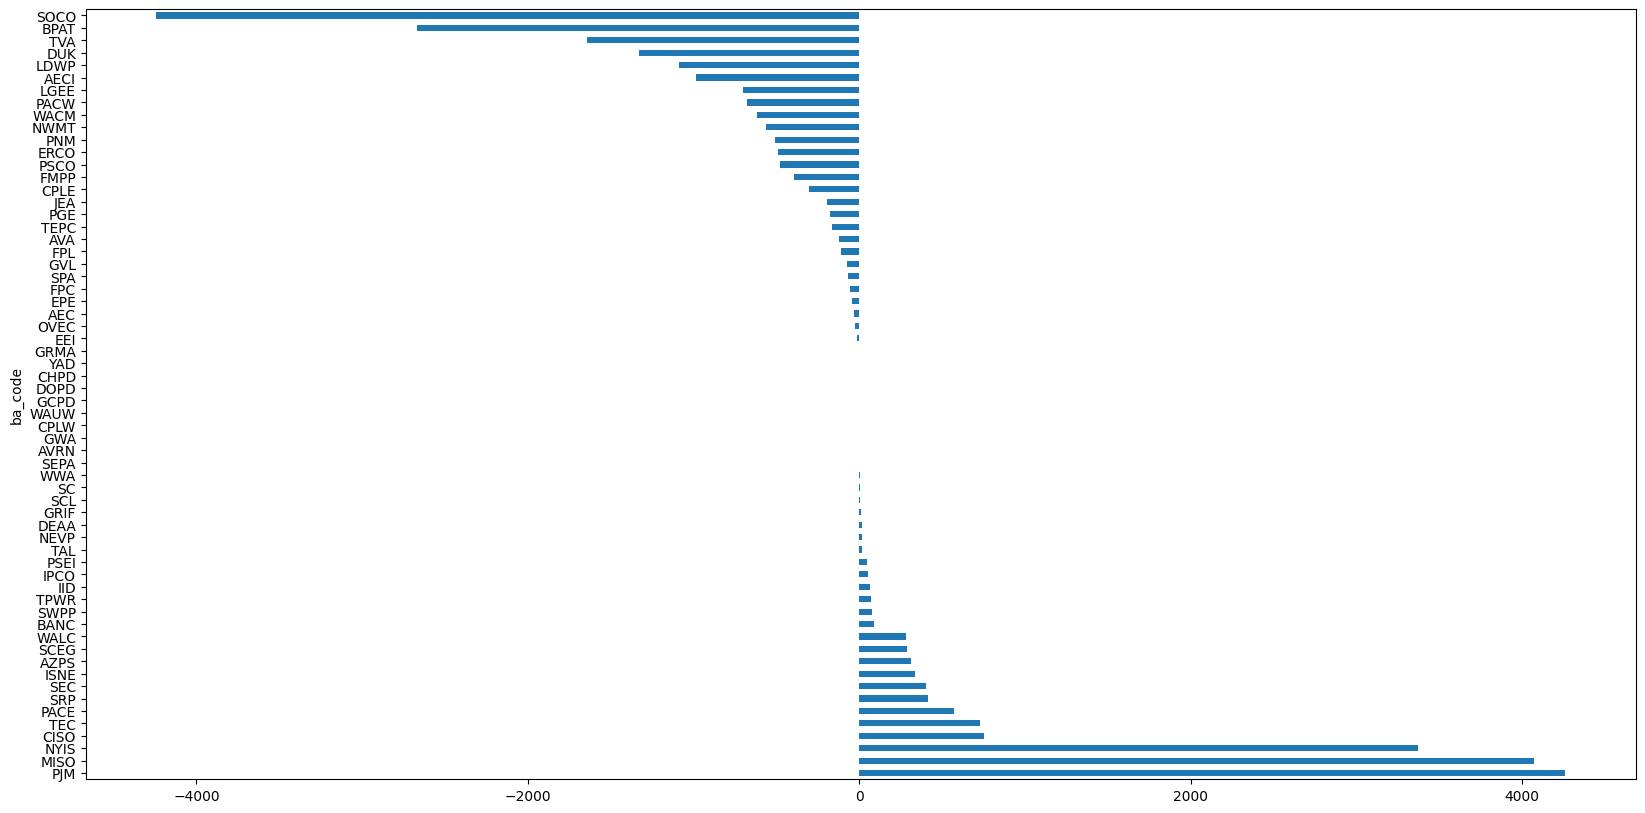

In [309]:
co2_annual['delta_co2_ktons'].sort_values(ascending=False).plot(kind='barh', figsize = (20,10))
